In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('police_data.csv')

In [3]:
df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [5]:
df.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61481.000000,61228.000000
mean,NaN,1967.791106,34.148984
std,NaN,121.050106,12.760710
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [6]:
df.isna().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [7]:
df.duplicated().sum()

321

In [8]:
df.shape

(65535, 15)

### Q. 1) Instruction ( For Data Cleaning ) - Remove the column that only contains missing values.

In [9]:
df.isna().sum()/df.shape[0]*100

stop_date               0.000000
stop_time               0.000000
country_name          100.000000
driver_gender           6.196689
driver_age_raw          6.186007
driver_age              6.572061
driver_race             6.195163
violation_raw           6.195163
violation               6.195163
search_conducted        0.000000
search_type            96.217288
stop_outcome            6.195163
is_arrested             6.195163
stop_duration           6.195163
drugs_related_stop      0.000000
dtype: float64

In [10]:
# we will removw country and search_type because they contain more then 95% of missing values

print(len(df.columns))
df.columns

15


Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [11]:
df.drop(columns=['country_name','search_type'],inplace=True)

In [12]:

print(len(df.columns))
df.columns

13


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

### Q. 2) Question ( Based on Filtering + Value Counts ) - For Speeding , were Men or Women stopped more often ? 

In [13]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [14]:
df_stop=df[df['violation_raw']=='Speeding']
df_stop['driver_gender'].value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

<AxesSubplot:>

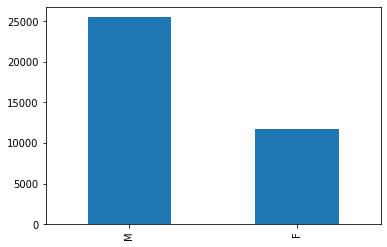

In [15]:
df_stop['driver_gender'].value_counts().plot(kind='bar')

### Q. 3) Question ( Groupby ) - Does gender affect who gets searched during a stop ?

In [16]:
df.groupby('search_conducted')['driver_gender'].count()

search_conducted
False    58995
True      2479
Name: driver_gender, dtype: int64

In [17]:
g=df.groupby('driver_gender')
g.get_group('M').search_conducted.value_counts()

False    43051
True      2113
Name: search_conducted, dtype: int64

In [18]:
g.get_group('F').search_conducted.value_counts()

False    15944
True       366
Name: search_conducted, dtype: int64

<AxesSubplot:>

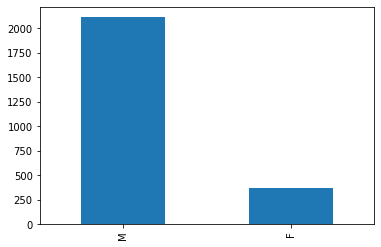

In [19]:
df[df['search_conducted']==True].driver_gender.value_counts().plot(kind='bar')

### Q. 4) Question ( mapping + data-type casting ) - What is the mean stop_duration ?

In [20]:
df.stop_duration.value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [21]:
df['stop_duration']=df['stop_duration'].replace({'0-15 Min':15,'16-30 Min':30,'30+ Min':45,'2':45})

In [22]:
df.stop_duration.mean()

19.085563237088248

### Q. 5) Question ( Groupby , Describe ) - Compare the age distributions for each violation.

In [23]:
df.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


In [24]:
df.groupby('violation')['driver_age'].std()

violation
Equipment              11.380671
Moving violation       13.258350
Other                  12.754423
Registration/plates    11.150780
Seat belt              10.214369
Speeding               12.615781
Name: driver_age, dtype: float64

In [25]:
df.groupby('violation')['driver_age'].describe().mean()

count    10203.833333
mean        34.172399
std         11.895729
min         16.833333
25%         24.916667
50%         31.666667
75%         42.000000
max         76.166667
dtype: float64